<a href="https://colab.research.google.com/github/arkaprabha10/Social-Network-Analysis/blob/main/trial%20epinion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import pylab
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import community
import community.community_louvain as community_louvain
import networkx as nx
import random
import collections

In [ ]:
# Run this cell only on colab
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [8]:
# for csv file
# Run this cell only on colab
link='https://drive.google.com/file/d/1KJ8Lb7RrvnRJGQOEKEjbdG8fq1UbBmWk/view?usp=sharing'
id = link.split("/")[-2] 
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('data.txt')

In [3]:
graph = nx.DiGraph()
epi_csv = pd.read_csv('bitcoin.csv', delimiter=",")
#epi_csv = pd.read_csv('data.txt', delimiter="\t")
print(epi_csv.shape)
print(epi_csv.head(5))
epi_csv.columns = ['From','To','Weight','Time']
# We check if the file has loaded
epi_csv.head()

# Adding the edges.
for index,row in epi_csv.iterrows():
    graph.add_edges_from([(row[0],row[1])],weight = row[2])

(35592, 4)
   Source  Destination  Weight          Time
0       6            2       4  1.289242e+09
1       6            5       2  1.289242e+09
2       1           15       1  1.289243e+09
3       4            3       7  1.289245e+09
4      13           16       8  1.289254e+09


In [4]:
# Number of nodes
print(graph.number_of_nodes())

# Number of edges
print(graph.number_of_edges())

# Positive and negative edges 

Stats = pd.DataFrame(graph.out_degree(),columns=['From','Outdegree']).sort_values('From')
Stats_2 =  pd.DataFrame(graph.in_degree(),columns=['To','Indegree']).sort_values('To')
b= epi_csv.groupby('From',as_index=False)[['Weight']].sum().sort_values('From')
c= epi_csv.groupby('To',as_index=False)[['Weight']].sum().sort_values('To')
Stats = Stats.merge(b,on='From',how='left')
Stats_2 = Stats_2.merge(c,on='To',how='left')
Stats['Pos_out'] = (  Stats['Outdegree'] + Stats['Weight']  )/2
Stats['Neg_out'] = (  Stats['Outdegree'] - Stats['Weight']  )/2
Stats_2['Pos_in']= (Stats_2['Indegree']  + Stats_2['Weight'])/2
Stats_2['Neg_in']= (Stats_2['Indegree']  - Stats_2['Weight'])/2
Stats = pd.merge(Stats,Stats_2,left_on='From', right_on='To').drop('To', axis=1)
Stats = Stats.drop(['Weight_x','Weight_y'],axis=1)
Stats.fillna(0,inplace=True)
Stats.head()

5881
35592


,From,Outdegree,Pos_out,Neg_out,Indegree,Pos_in,Neg_in
0,1.0,215,324.0,-109.0,226,513.5,-287.5
1,2.0,45,94.0,-49.0,41,82.0,-41.0
2,3.0,0,0.0,0.0,21,7.5,13.5
3,4.0,63,119.0,-56.0,54,111.0,-57.0
4,5.0,3,5.0,-2.0,3,5.0,-2.0


In [5]:
Stats.describe()
print(Stats.max(axis=0))

From         6005.0
Outdegree     763.0
Pos_out       818.5
Neg_out       698.0
Indegree      535.0
Pos_in        775.5
Neg_in        378.0
dtype: float64


In [6]:
print(graph.number_of_edges())
print(graph.number_of_nodes())
print(nx.average_clustering(graph))
print(nx.transitivity(graph))
print(nx.density(graph))

35592
5881
0.15106980550907195
0.04504348485705065
0.0010292571373048454


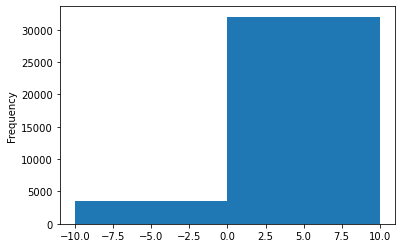

In [7]:
epi_csv['Weight'].plot.hist(bins=2, alpha=1)
plt.xlabel('')
plt.show()

Counter({1: 2427, 2: 1042, 3: 565, 4: 335, 5: 235, 6: 189, 7: 142, 8: 95, 9: 87, 10: 75, 11: 68, 12: 46, 16: 40, 13: 39, 14: 38, 18: 30, 15: 27, 19: 24, 0: 23, 20: 22, 21: 21, 17: 21, 29: 15, 26: 13, 23: 13, 25: 12, 27: 11, 24: 11, 37: 10, 31: 9, 54: 8, 38: 7, 36: 7, 33: 7, 32: 7, 28: 7, 53: 6, 34: 6, 22: 6, 47: 5, 30: 5, 55: 4, 48: 4, 44: 4, 41: 4, 35: 4, 82: 3, 69: 3, 64: 3, 63: 3, 52: 3, 51: 3, 50: 3, 46: 3, 45: 3, 128: 2, 118: 2, 115: 2, 100: 2, 96: 2, 85: 2, 81: 2, 80: 2, 74: 2, 71: 2, 68: 2, 58: 2, 57: 2, 43: 2, 42: 2, 39: 2, 535: 1, 412: 1, 311: 1, 279: 1, 264: 1, 226: 1, 222: 1, 216: 1, 203: 1, 191: 1, 180: 1, 179: 1, 165: 1, 164: 1, 158: 1, 145: 1, 144: 1, 136: 1, 134: 1, 133: 1, 132: 1, 129: 1, 123: 1, 117: 1, 113: 1, 110: 1, 105: 1, 103: 1, 99: 1, 98: 1, 95: 1, 93: 1, 92: 1, 84: 1, 83: 1, 79: 1, 72: 1, 66: 1, 65: 1, 62: 1, 61: 1, 60: 1, 59: 1, 56: 1, 49: 1, 40: 1})


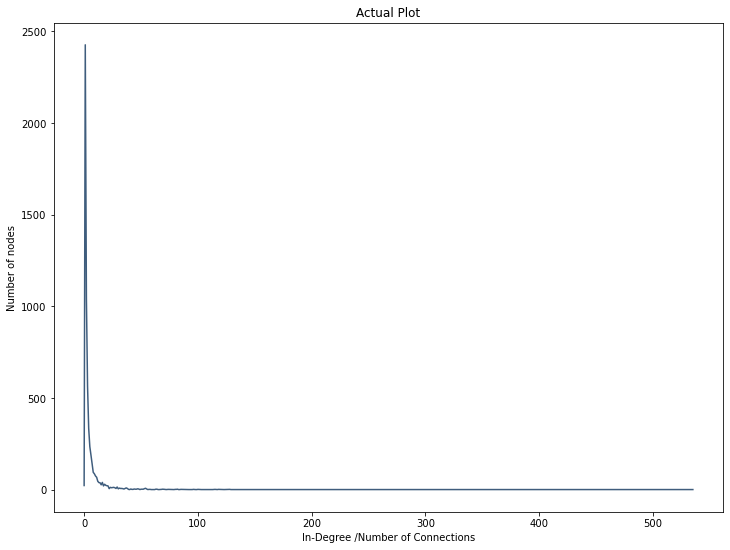

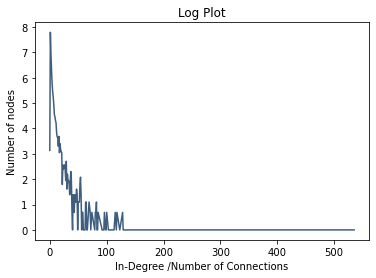

In [8]:
# Degree distribtion for In-degree
degree_sequence = sorted([d for n, d in graph.in_degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
print(degreeCount)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots(figsize=(12, 9))
plt.plot(deg,cnt,color="#3F5D7D")
plt.xlabel('In-Degree /Number of Connections')
plt.ylabel('Number of nodes')
plt.title('Actual Plot')
plt.show()
print()
plt.plot(deg,(np.log(cnt)),color="#3F5D7D")
plt.xlabel('In-Degree /Number of Connections')
plt.ylabel('Number of nodes')
plt.title('Log Plot')
plt.show()


Counter({1: 1793, 0: 1067, 2: 821, 3: 479, 4: 311, 5: 235, 6: 147, 8: 120, 7: 116, 9: 77, 10: 70, 11: 59, 12: 54, 13: 40, 17: 28, 14: 27, 16: 26, 21: 21, 15: 20, 18: 19, 28: 18, 19: 16, 26: 14, 20: 14, 32: 13, 27: 13, 22: 13, 25: 12, 23: 12, 31: 11, 24: 11, 45: 8, 56: 7, 36: 7, 35: 7, 38: 6, 37: 6, 29: 6, 63: 5, 44: 5, 43: 5, 42: 5, 40: 5, 34: 5, 30: 5, 69: 4, 65: 4, 59: 4, 49: 4, 47: 4, 46: 4, 74: 3, 67: 3, 58: 3, 54: 3, 53: 3, 50: 3, 264: 2, 172: 2, 104: 2, 90: 2, 86: 2, 84: 2, 79: 2, 78: 2, 70: 2, 66: 2, 60: 2, 55: 2, 52: 2, 51: 2, 48: 2, 39: 2, 763: 1, 406: 1, 404: 1, 397: 1, 293: 1, 232: 1, 215: 1, 212: 1, 210: 1, 203: 1, 202: 1, 200: 1, 197: 1, 190: 1, 186: 1, 170: 1, 169: 1, 167: 1, 164: 1, 162: 1, 154: 1, 141: 1, 138: 1, 133: 1, 128: 1, 127: 1, 125: 1, 115: 1, 108: 1, 107: 1, 106: 1, 105: 1, 100: 1, 94: 1, 93: 1, 92: 1, 89: 1, 83: 1, 82: 1, 80: 1, 77: 1, 76: 1, 75: 1, 71: 1, 64: 1, 62: 1, 41: 1, 33: 1})


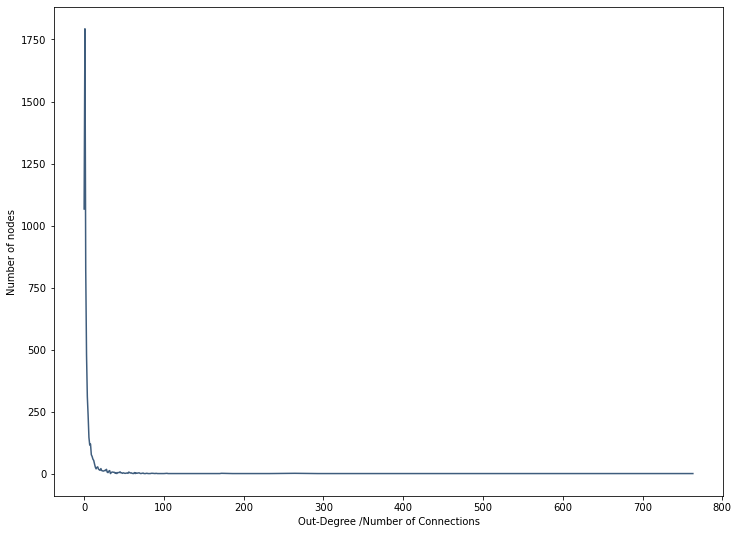

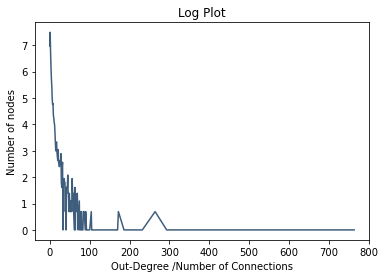

In [9]:
# Degree distribtion for out-degree
degree_sequence = sorted([d for n, d in graph.out_degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
print(degreeCount)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots(figsize=(12, 9))
plt.plot(deg,cnt,color="#3F5D7D")
plt.xlabel('Out-Degree /Number of Connections')
plt.ylabel('Number of nodes')
plt.show()

print()
plt.plot(deg,(np.log(cnt)),color="#3F5D7D")
plt.xlabel('Out-Degree /Number of Connections')
plt.ylabel('Number of nodes')
plt.title('Log Plot')
plt.show()


In [10]:
# Degree centrality stats
print("In-degree")
in_degree_centrality_nodes = nx.in_degree_centrality(graph)
in_degree_centrality_nodes = collections.Counter(in_degree_centrality_nodes)
for k, v in in_degree_centrality_nodes.most_common(10):
  print ((k, v))
print("\n Out-degree \n")
out_degree_centrality_nodes = nx.out_degree_centrality(graph)
out_degree_centrality_nodes = collections.Counter(out_degree_centrality_nodes)
for k, v in out_degree_centrality_nodes.most_common(10):
  print ((k, v))

# degree_centrality_nodes = nx.degree_centrality(graph)
# degree_centrality_nodes = collections.Counter(degree_centrality_nodes)
# for k, v in degree_centrality_nodes.most_common(100):
#   print (k,v)


In-degree
(35.0, 0.09098639455782312)
(2642.0, 0.07006802721088434)
(1810.0, 0.05289115646258503)
(2028.0, 0.047448979591836735)
(905.0, 0.044897959183673466)
(1.0, 0.03843537414965986)
(4172.0, 0.03775510204081632)
(7.0, 0.03673469387755102)
(4197.0, 0.03452380952380952)
(13.0, 0.03248299319727891)

 Out-degree 

(35.0, 0.12976190476190474)
(2642.0, 0.06904761904761904)
(1810.0, 0.06870748299319727)
(2125.0, 0.06751700680272109)
(2028.0, 0.049829931972789114)
(905.0, 0.044897959183673466)
(4172.0, 0.044897959183673466)
(7.0, 0.03945578231292517)
(1.0, 0.036564625850340135)
(3129.0, 0.03605442176870748)


In [11]:
# Eigen Vector centrality stats
print("Eigen Vector centrality")
eigenvector_centrality_nodes = nx.eigenvector_centrality_numpy(graph)
eigenvector_centrality_nodes = collections.Counter(eigenvector_centrality_nodes)
for k, v in eigenvector_centrality_nodes.most_common(10):
  print ((k, v))


Eigen Vector centrality
(2642.0, 0.20221058479145843)
(905.0, 0.19012652264436103)
(1810.0, 0.16982089076458157)
(35.0, 0.15472280593409476)
(2028.0, 0.15008323742173174)
(4172.0, 0.14632041848826038)
(1.0, 0.13540793758269917)
(4291.0, 0.13529331666497174)
(1334.0, 0.13138473644433785)
(4197.0, 0.12796758064486605)


In [13]:
# Katz centrality stats
# Not running on colab
print("Katz centrality")
katz_centrality_numpy_nodes = nx.katz_centrality_numpy(graph)
katz_centrality_numpy_nodes = collections.Counter(katz_centrality_numpy_nodes)
for k, v in katz_centrality_numpy_nodes.most_common(10):
  print ((k, v))


Katz centrality


MemoryError: Unable to allocate 64.7 GiB for an array with shape (131828, 131828) and data type int32

In [12]:
# Closeness centrality stats
# Not running on colab
print("closeness centrality ")
closeness_centrality_nodes = nx.closeness_centrality(graph)
closeness_centrality_nodes = collections.Counter(closeness_centrality_nodes)
for k, v in closeness_centrality_nodes.most_common(10):
  print ((k, v))


closeness centrality 


KeyboardInterrupt: 

In [ ]:
# Betweenness centrality stats
# Not running on colab
print("Betweenness centrality ")
betweenness_centrality_nodes = nx.betweenness_centrality(graph)
betweenness_centrality_nodes = collections.Counter(betweenness_centrality_nodes)
for k, v in betweenness_centrality_nodes.most_common(10):
  print ((k, v))

Betweenness centrality 


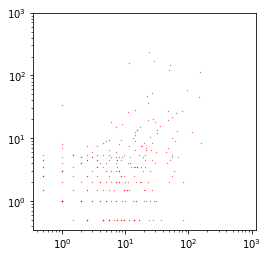

In [13]:
# Out degree and indegree relationship, relationship between positive and negative weighted outgoing 
# edges in the network and relationship between positive and negative ingoing edges.

plt.figure(figsize=(4,4))
plt.plot(Stats['Pos_out'],Stats['Neg_out'],'ro',markersize=0.25)
plt.xscale('log')
plt.yscale('log')

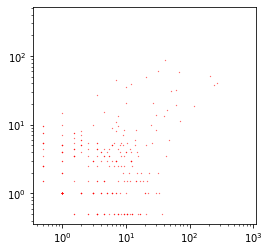

In [14]:
plt.figure(figsize=(4,4))
plt.plot(Stats['Pos_in'],Stats['Neg_in'],'ro',markersize=0.25)
plt.xscale('log')
plt.yscale('log')

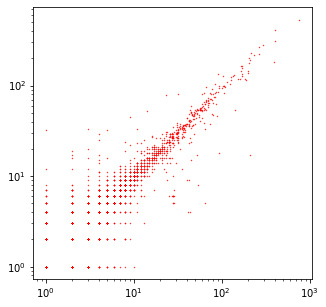

In [15]:
plt.figure(figsize=(5,5))
plt.plot(Stats['Outdegree'],Stats['Indegree'],'ro',markersize=0.4)
plt.xscale('log')
plt.yscale('log')

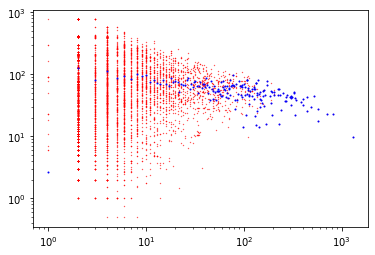

In [16]:
Deg_cor = nx.average_neighbor_degree(graph,target='out')
dict_list = []
for key, value in Deg_cor.items():
    temp = [key,value]
    temp[0] = graph.degree(key,'out')
    dict_list.append(temp)
dfa1 = pd.DataFrame(dict_list,columns =['Outdegree','Average neighbors outdegree'])
dfa2 = dfa1.groupby('Outdegree',as_index=False)['Average neighbors outdegree'].mean()
plt.plot(dfa1['Outdegree'],dfa1['Average neighbors outdegree'],'ro',markersize=0.3)
plt.plot(dfa2['Outdegree'],dfa2['Average neighbors outdegree'],'bo',markersize=1)
plt.xscale('log')
plt.yscale('log')

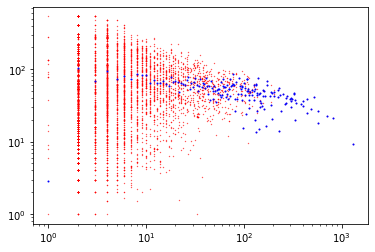

In [17]:
Deg_cor = nx.average_neighbor_degree(graph,target='in')
dict_list = []
for key, value in Deg_cor.items():
    temp = [key,value]
    temp[0] = graph.degree(key,'in')
    dict_list.append(temp)
dfa1 = pd.DataFrame(dict_list,columns =['Indegree','Average neighbors indegree'])
dfa2 = dfa1.groupby('Indegree',as_index=False)['Average neighbors indegree'].mean()
plt.plot(dfa1['Indegree'],dfa1['Average neighbors indegree'],'ro',markersize=0.3)
plt.plot(dfa2['Indegree'],dfa2['Average neighbors indegree'],'bo',markersize=1)

plt.xscale('log')
plt.yscale('log')

In [18]:
print(nx.degree_assortativity_coefficient(graph,'in','in'))
print(nx.degree_assortativity_coefficient(graph,'out','out'))

-0.07953460703786223
-0.107298413214735


In [19]:
nx.degree_assortativity_coefficient(graph)

-0.0925342322018264

In [ ]:
# Let top 200 out of 300 people adopt a certain opinion
import random
random.seed(5)
op1 = Stats[['From','Pos_in']].sort_values(by=['Pos_in'], ascending=False)[0:300]
op2 = Stats[['From','Neg_in']].sort_values(by=['Neg_in'], ascending=False)[0:100]
adopters =  random.sample(list(op1['From']), k=200) + random.sample(list(op2['From']), k=50)
Stats['Adopt']   = 0
Stats['Heard']   = 0
Stats['Adopted'] = 0
for node in adopters :
    Stats.loc[node-1,'Adopt'] = 1

Total_adopters = 250
c = []
change = True
threshold = 0.4
j=0 
while change:
    new_adopters = 0
    for node in graph.nodes:
        if Stats.loc[node-1,'Heard'] == 0:
            Stats.at[node-1,'Heard'] = j
        if Stats.loc[node-1,'Adopt'] == 0 and graph.out_degree(node)!= 0:
            trust_ch = 0
            no_out = graph.out_degree(node) 
            for outgoing in graph.successors(node):
                if Stats.loc[outgoing-1,'Adopt'] == 1:
                    trust_ch += graph.get_edge_data(node,outgoing).get('weight')
            if trust_ch / no_out > threshold:
                Stats.at[node-1,'Adopt'] = 1
                Stats.at[node-1,'Adopted'] = j
                new_adopters += 1
    c.append(new_adopters)  
    j+=1 
    print('The number of new adopters at step ' + str(j) + ' is ' + str(new_adopters))
    if new_adopters == 0:
        change = False

KeyError: -1

In [20]:
import random
random.seed(5)
op1 = Stats[['From','Pos_in']].sort_values(by=['Pos_in'], ascending=False)[0:300]
op2 = Stats[['From','Neg_in']].sort_values(by=['Neg_in'], ascending=False)[0:100]
adopters =  random.sample(list(op1['From']), k=200) + random.sample(list(op2['From']), k=50)
Stats['Adopt']   = 0
Stats['Heard']   = 0
Stats['Adopted'] = 0
for node in adopters :
    Stats.loc[node-1,'Adopt'] = 1

<AxesSubplot:>

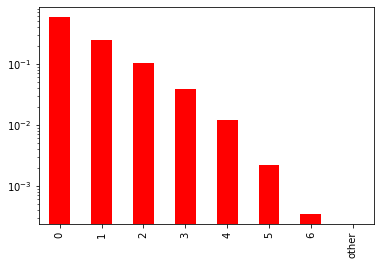

In [21]:
import math
pos = Stats['Indegree'][Stats['Indegree'] != 0]
pos = pos.transform(lambda x: math.floor(math.log(x)) )

prob = pos.value_counts(normalize=True)
threshold = 0.0001
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
prob.plot(kind='bar',log=True,color='r')

In [22]:
import math
import igraph
pos = Stats['Indegree'][Stats['Indegree'] != 0]
igraph.power_law_fit(pos)

FittedPowerLaw(continuous=False, alpha=2.2708004913565087, xmin=14.0, L=-2129.526476857989, D=0.03771249238649671, p=0.45900743622901696)

In [23]:
nx.degree_assortativity_coefficient(graph,'in')

-0.07953460703786223

In [24]:
nx.degree_assortativity_coefficient(graph,'out')


-0.0925342322018264

In [25]:
nx.degree_assortativity_coefficient(graph)


-0.0925342322018264

In [26]:
SCC = max(nx.strongly_connected_components(graph), key=len)
print('Size of maximal strongly connected component is ' + str(len(SCC)))
WCC = max(nx.weakly_connected_components(graph), key=len)
print('Size of maximal weakly connected component is ' + str(len(WCC)))
DIF = list(set(WCC)-set(SCC))
OUT_C = []
IN_C = []
IN = 0
OUT = 0
for index, node1 in enumerate(DIF):
    for index2, node2 in enumerate(SCC):
        
        if graph.has_edge(node1,node2):
            OUT+=1
            OUT_C.append(node2)
            break
        elif graph.has_edge(node2,node1):
            IN+=1
            IN_C.append(node1)
            break

    
TND = len(DIF)-IN-OUT
print(IN,OUT,TND)

Size of maximal strongly connected component is 4709
Size of maximal weakly connected component is 5875
1128 24 14


In [27]:
SCC = max(nx.strongly_connected_components(graph), key=len)
scc_com = graph.subgraph(SCC).copy()
scc2 = nx.Graph(scc_com)

# Removing the weights.

for u,v,d in scc2.edges(data=True):
    d['weight']=1

communities =community_louvain.best_partition(scc2,random_state=5)

In [28]:
print(set(communities.values()))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}


In [29]:
ind_graph = community_louvain.induced_graph(communities, scc2)

inv_map = dict()
for key, value in communities.items():
    inv_map.setdefault(value, list()).append(key)
    
# Removing the small communities

inv_map2 = {key:val for key, val in inv_map.items() if len(val) >= 100}
sizes = np.array([len(inv_map2[k]) for k in list(inv_map2.keys())])

# Removing edges from the graph:

inv_keys = [key for key in inv_map2]
ind_nodes = list(ind_graph.nodes())
for node in ind_nodes:
    if node not in inv_keys:
        ind_graph.remove_node(node)

In [30]:
community_louvain.modularity(communities,scc2)

0.45950699836604625

In [31]:
print(sizes)

[1418  478  963  275  367  664  289]


<AxesSubplot:>

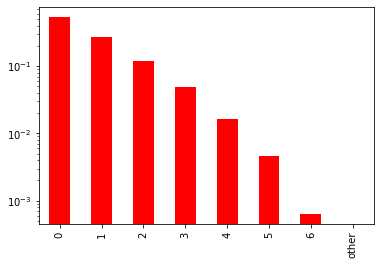

In [32]:
import math
pos = Stats['Outdegree'][Stats['Outdegree'] != 0]
pos = pos.transform(lambda x: math.floor(math.log(x)) )

prob = pos.value_counts(normalize=True)
threshold = 0.0001
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
prob.plot(kind='bar',log=True,color='r')

In [33]:
import math
import igraph
pos = Stats['Outdegree'][Stats['Outdegree'] != 0]
igraph.power_law_fit(pos)

FittedPowerLaw(continuous=False, alpha=2.0594194099874947, xmin=7.0, L=-3867.4715034046003, D=0.03596101626367321, p=0.14001515291254854)

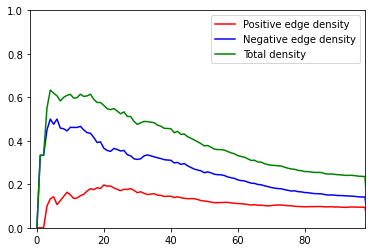

0.8654670094258783

In [34]:
# We want to see the rich club effect in the 100 edges with the highest indegree.
picked = 100
rce1 = Stats[['From','Indegree']].sort_values(by=['Indegree'], ascending=False)[0:picked]
rich = list(rce1.From.values)
rece_graph = graph.subgraph(rich).copy()
# Dropping first value

densities = np.zeros((3,picked))
pos_edges = 0
neg_edges = 0 
for rank, node1 in enumerate(rich[1::]):
    
    for rank2, node2 in enumerate(rich[:rank+1]): 
        if graph.has_edge(node1, node2):
            if graph[node1][node2]['weight'] == 1:
                pos_edges += 1
            else:
                neg_edges += 1
        if graph.has_edge(node2, node1):
            if graph[node2][node1]['weight'] == 1:
                pos_edges += 1
            else:
                neg_edges += 1
            
    densities[0][rank] = pos_edges/(rank+2)/(rank+1)
    densities[1][rank] = neg_edges/(rank+2)/(rank+1)
    densities[2][rank] = (pos_edges + neg_edges)/(rank+2)/(rank+1)
    

plt.plot( [i for i in range(0,picked)],densities[0,],'r-',label='Positive edge density')
plt.plot( [i for i in range(0,picked)],densities[1,],'b-',label='Negative edge density')
plt.plot( [i for i in range(0,picked)],densities[2,],'g-',label='Total density')
plt.legend(loc="upper right")
plt.ylim((0,1))
plt.xlim((-2,picked-2))
plt.show()


# Checking the one sidedness
nx.reciprocity(rece_graph)

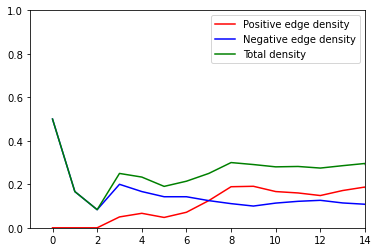

In [35]:
# We want to see the rich club effect in the 100 edges with the highest negative_degree.
picked = 16
rce2 = Stats[['From','Neg_in']].sort_values(by=['Neg_in'], ascending=False)[4:picked+4]
rich = list(rce2.From.values)
# Dropping first value

densities = np.zeros((3,picked))
pos_edges = 0
neg_edges = 0 

for rank, node1 in enumerate(rich[1::]):
    
    for rank2, node2 in enumerate(rich[:rank+1]): 
        if graph.has_edge(node1, node2):
            if graph[node1][node2]['weight'] == 1:
                pos_edges += 1
            else:
                neg_edges += 1
        if graph.has_edge(node2, node1):
            if graph[node2][node1]['weight'] == 1:
                pos_edges += 1
            else:
                neg_edges += 1
                
            
    densities[0][rank] = pos_edges/(rank+2)/(rank+1)
    densities[1][rank] = neg_edges/(rank+2)/(rank+1)
    densities[2][rank] = (pos_edges + neg_edges)/(rank+2)/(rank+1)
    

plt.plot( [i for i in range(0,picked)],densities[0,],'r-',label='Positive edge density')
plt.plot( [i for i in range(0,picked)],densities[1,],'b-',label='Negative edge density')
plt.plot( [i for i in range(0,picked)],densities[2,],'g-',label='Total density')
plt.legend(loc="upper right")
plt.ylim((0,1))
plt.xlim((-1,picked-2))
plt.show()

In [51]:
# new community code

In [43]:
random_g = nx.fast_gnp_random_graph(100,p=0.5)

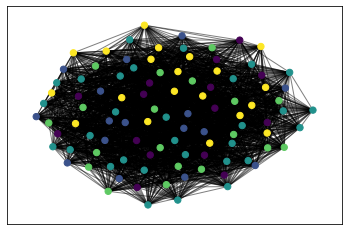

In [44]:
# compute the best partition
partition = community_louvain.best_partition(random_g)

# draw the graph
pos = nx.spring_layout(random_g)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(random_g, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(random_g, pos, alpha=0.5)
plt.show()


In [49]:
partition

{0: 0,
 1: 0,
 2: 1,
 3: 2,
 4: 2,
 5: 2,
 6: 2,
 7: 4,
 8: 3,
 9: 0,
 10: 3,
 11: 1,
 12: 1,
 13: 3,
 14: 2,
 15: 2,
 16: 0,
 17: 4,
 18: 0,
 19: 2,
 20: 1,
 21: 0,
 22: 3,
 23: 4,
 24: 0,
 25: 4,
 26: 4,
 27: 0,
 28: 4,
 29: 4,
 30: 4,
 31: 2,
 32: 1,
 33: 3,
 34: 1,
 35: 2,
 36: 2,
 37: 1,
 38: 2,
 39: 2,
 40: 4,
 41: 3,
 42: 0,
 43: 2,
 44: 3,
 45: 4,
 46: 2,
 47: 4,
 48: 3,
 49: 4,
 50: 4,
 51: 3,
 52: 1,
 53: 3,
 54: 0,
 55: 4,
 56: 1,
 57: 1,
 58: 0,
 59: 1,
 60: 3,
 61: 1,
 62: 4,
 63: 1,
 64: 4,
 65: 2,
 66: 3,
 67: 0,
 68: 3,
 69: 3,
 70: 4,
 71: 2,
 72: 2,
 73: 4,
 74: 3,
 75: 2,
 76: 3,
 77: 3,
 78: 0,
 79: 0,
 80: 0,
 81: 1,
 82: 1,
 83: 2,
 84: 2,
 85: 4,
 86: 2,
 87: 2,
 88: 2,
 89: 2,
 90: 2,
 91: 2,
 92: 3,
 93: 2,
 94: 4,
 95: 2,
 96: 2,
 97: 2,
 98: 3,
 99: 1}